# Q5

In [190]:
import pandas as pd
import numpy as np
import random
from math import sqrt
from PIL import Image as im
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('archive/fashion-mnist_train.csv')

In [8]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df = df.drop(labels='label', axis=1)

In [75]:
train_df = df[0:1000]
test_df = df[1000:1300]

In [76]:
train_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,12,...,164,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,170,193,11,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
test_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,86,184,0,...,117,112,82,88,84,90,0,4,0,0
1002,0,0,0,0,1,0,0,15,61,69,...,0,0,59,0,0,1,0,0,0,0
1003,0,0,0,0,0,0,0,0,4,0,...,3,48,1,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,2,0,17,...,149,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,2,0,...,0,0,1,0,0,0,0,0,0,0
1297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1298,0,0,0,0,0,0,0,0,0,0,...,0,0,22,61,42,0,0,0,0,0


In [209]:
trainVecs = train_df.to_numpy()
testVecs = test_df.to_numpy()

In [287]:
class SOM:
    def __init__(self, inputDim, outputDim):
        self.n = inputDim
        self.m = outputDim
        self.w = np.array(self.setWeights())
        self.setGroups()
        self.alpha = 0.9
        self.nextAlpha = 0.5
    
    def setWeights(self):
        result = [[0 for _ in range(self.n)] for _ in range(self.m)]
        for i in range(self.m):
            for j in range(self.n):
                result[i][j] = random.random()
        return result
    
    def setGroups(self):
        r = int(sqrt(self.m))
        c = int((r - 1) / 2)
        self.groups = [[] for _ in range(c + 1)]
        self.d = {}
        for i in range(r):
            for j in range(r):
                cur_point = i * r + j
                if abs(i - c) > abs(j - c):
                    self.groups[abs(i - c)].append(cur_point)
                    self.d[cur_point] = abs(i - c)
                else:
                    self.groups[abs(j - c)].append(cur_point)
                    self.d[cur_point] = abs(j - c)
    
    def update_weights(self, vec, res):
        min_index = np.argmin(res)
        min_index_group = self.d[min_index]
        for node_ind in self.groups[min_index_group]:
            for j in range(self.n):
                self.w[node_ind] = self.w[node_ind] + self.alpha * (vec - self.w[node_ind])
        
    def train(self, inputVecs, epochs):
        cluster_info = []
        cluster_info.append(self.w.copy())
        for i in range(epochs):
            print('epoch : ', i + 1)
            for vec in inputVecs: 
                res = (self.w - vec) * (self.w - vec)
                res = np.sum(res, axis=1)
                self.update_weights(vec, res)
            cluster_info.append(self.w.copy())
            self.alpha *= self.nextAlpha
        return cluster_info
        
    def test(self, inputVecs):
        cluster_info = [0 for _ in range(self.m)]
        for vec in inputVecs:
            res = (self.w - vec) * (self.w - vec)
            res = np.sum(res, axis=1)
            min_index = np.argmin(res)
            cluster_info[min_index] += 1
        plt.plot(range(self.m), cluster_info)
        plt.xlabel('Cluster')
        plt.ylabel('Vectors')
        plt.show()
        return cluster_info

In [288]:
som = SOM(784, 225)

In [289]:
train_cluster_info = som.train(trainVecs, 4)

epoch :  1
epoch :  2
epoch :  3
epoch :  4


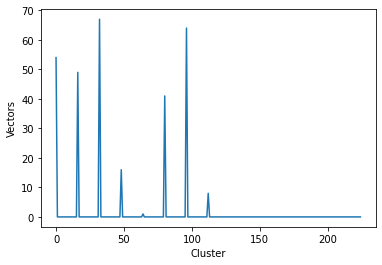

In [290]:
test_cluster_info = som.test(testVecs)

In [315]:
def plot_images(cluster_info, index):
    fig = plt.figure(figsize=(8, 8))
    columns = 15
    rows = 15
    for i in range(len(cluster_info[index])):
        cur_image = np.reshape(cluster_info[index][i], (28, 28))
        data = im.fromarray(cur_image)
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(data)
    plt.show()

def plot_cluster(cluster_info, index, cnt):
    cur_image = np.reshape(cluster_info[-1][index], (28, 28))
    data = im.fromarray(cur_image)
    plt.imshow(data)
    plt.xlabel('Cluster ' + str(index) + ', Count = ' + str(cnt))
    plt.show()

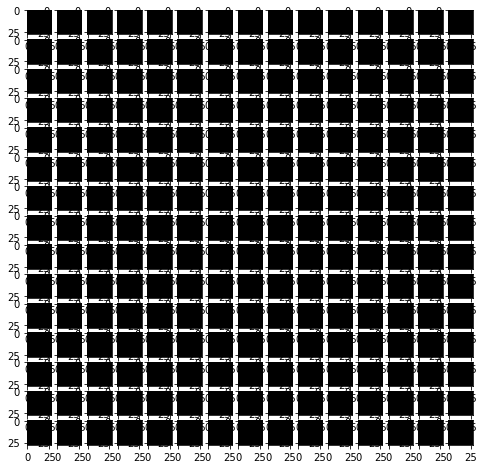

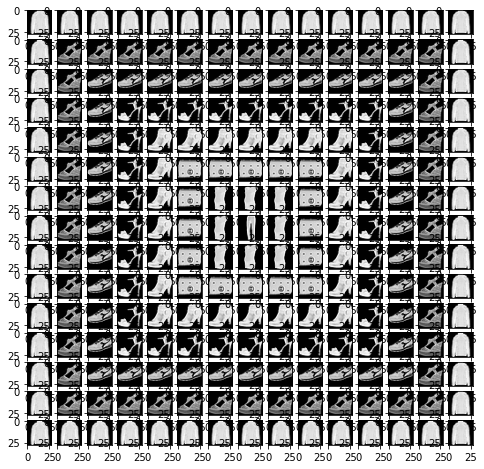

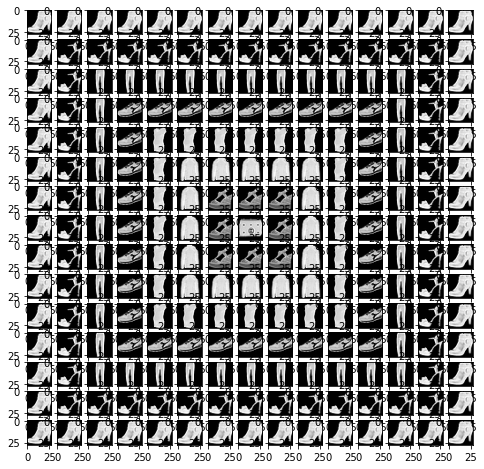

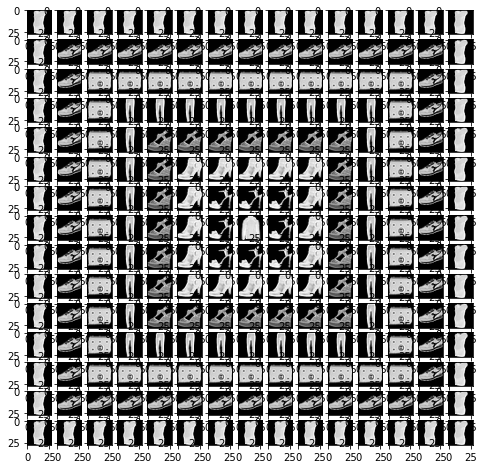

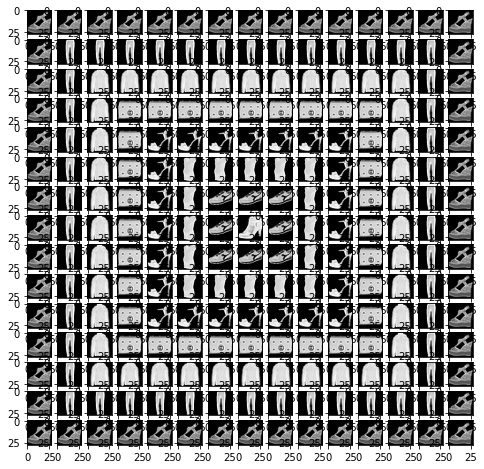

In [293]:
for i in range(len(train_cluster_info)):
    plot_images(train_cluster_info, i)

In [307]:
def cmp(el):
    return -el[0]

In [319]:
test_cluster_info_with_index = []
for i in range(len(test_cluster_info)):
    test_cluster_info_with_index.append((test_cluster_info[i], i))

test_cluster_info_with_index = sorted(test_cluster_info_with_index, key=cmp)

In [320]:
final_cluster = test_cluster_info_with_index[0:8]

In [322]:
final_cluster

[(67, 32), (64, 96), (54, 0), (49, 16), (41, 80), (16, 48), (8, 112), (1, 64)]

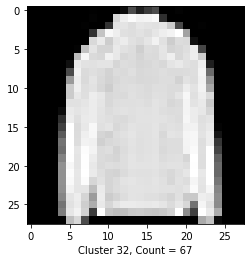

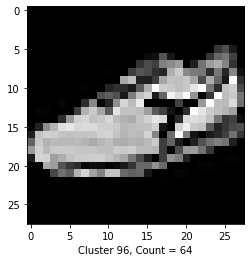

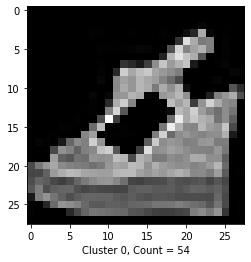

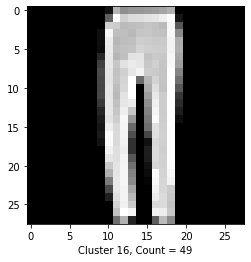

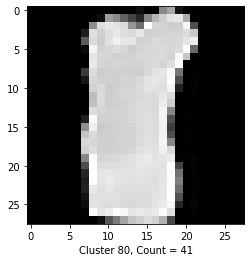

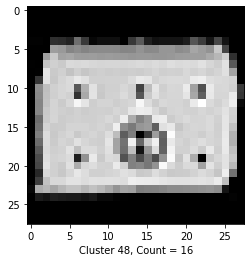

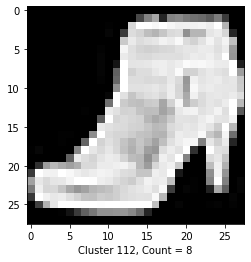

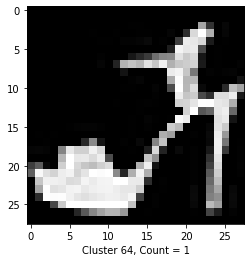

In [321]:
for cluster in final_cluster:
    plot_cluster(train_cluster_info, cluster[1], cluster[0])